<a href="https://colab.research.google.com/github/jdansb/Econophysics/blob/main/files/monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I had initially decided to use this space to focus only on quantitative discussions about econophysics models, mainly aiming to share code and the mathematical development of these models. I thought this because I felt I did not have the capacity to engage in a conceptual discussion about economics. However, I believe there are some conceptual discussions within econophysics that should be remembered. This is why I decided to bring a paper on the [Philosophy of Econophysics](https://github.com/jdansb/Econophysics/blob/main/files/Filosofia%20da%20Econof%C3%ADsica.md), and today I want to present the paper [Monetary Economics from an Econophysics Perspective](https://arxiv.org/abs/1608.04832) written by Victor M. Yakovenko, where, as he himself says: "the style of this paper is quite informal, and the primary focus is on conceptual foundation, rather than technical details of mathematical models and empirical data."

Since his model has an indisputable importance in establishing wealth distribution inequality as one of the main objects of study in econophysics, I believe it is interesting to engage with this conceptual discussion about his models. As in the previous case, my text is meant to be no more than a summary of the full work, where I attempt to compile the excerpts I consider most important.

Although this is not the part that interests me most at the moment, I would like to highlight the result of Yakovenko's model:

> …there are few rich agents with high monetary balances and many poor agents with low balances, so the distribution is highly unequal, even though the agents are statistically identical. This is a shocking conclusion for the social sciences, where inequality is generally attributed to intrinsic differences between agents. There is a critique that many economists are not fully familiar with the concept of statistical equilibrium, but only with mechanical equilibrium.

To proceed, we need to start with the definition of money: money is then just a digital accounting, a digital token, that is, it can be expressed as a number. Moreover, by its very functioning, money must necessarily be conserved, so this is not a peculiar artifact but a fundamental accounting principle on which the functionality of money is based. That is, the agents involved cannot produce or destroy money.

This becomes explicit when we list the three properties of money: medium of exchange, measure of value, and store of value, which only make sense if money is conserved. These properties would be lost if agents were able to produce money themselves.

How money can arise in a system where agents cannot produce it? Suppose we have a system where all agents start with 0 money, but when one agent provides a service to another, the balances of both agents change conservatively, that is, we can simply record that one agent now has a negative balance for having ‘paid’ and another agent has a positive balance for having ‘received’; it is just a matter of accounting. However, what happens in this system if there is no lower limit on negative balances? Could I indefinitely enjoy the services of others? In this sense, it is necessary to impose a minimum limit, such that as soon as an agent reaches this balance, they cannot receive services without providing them.

At this point, we can simplify money by shifting all balances so that the negative limit is now zero. This is equivalent to initially giving each agent an initial amount of money equal in magnitude to the previous minimum limit. Thus, the minimum balance is now zero, and the initial balance (or now, the initial money) is an amount greater than zero. Since money is now positive, we could even use physical objects as symbols of money. Yakovenko cites Modern Monetary Theory (MMT) as a reference for discussing how money is created at the national scale.

What I find most interesting are two things. First, as already mentioned, the initial condition of monetary balances among agents, even if they are statistically identical, does not lead to an equal distribution of money. Second, quoting Yakovenko:

> The laissez-faire economic school argues that if all constraints and regulations are removed, the economy will reach a natural equilibrium and should remain so. However, this argument is misleading, since equilibrium cannot be reached without the imposition of boundary conditions, that is, regulations.

To illustrate the discussion, we can work with a simple code example. First, let's build a model where we have N agents with 10 coins each. At each step, we randomly select 2 agents and transfer one coin from one agent to the other. The result at three different time steps can be seen below.

What we can observe is that this system without restrictions does not reach equilibrium. As time progresses, the curve in the histogram becomes flatter and flatter, never reaching a true equilibrium, since it is always possible for an agent to increase their debt to an infinite amount.


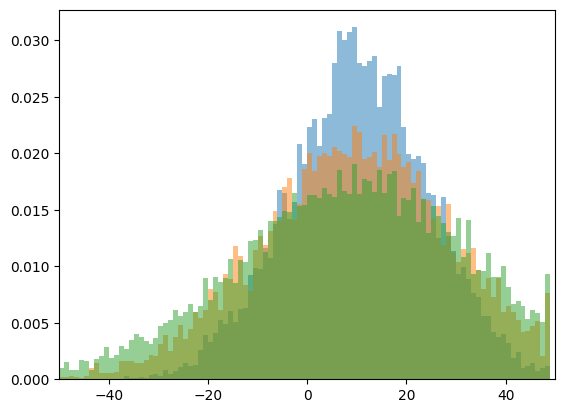

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    M[a] = M[a] - 1
    M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100))

bins = np.arange(-50, 50, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-50,50])
plt.show()



Below we perform a similar simulation, but now we set a lower limit of 0. That is, an agent cannot incur debt. If a given agent's wealth is 0, they can only gain coins, not give them away. Two results can be observed here:

1. The system reaches equilibrium: we can see that the histogram at 3 different time steps is qualitatively the same.
2. Even though the initial conditions and the rules of exchange are identical, the final wealth distribution is highly unequal.


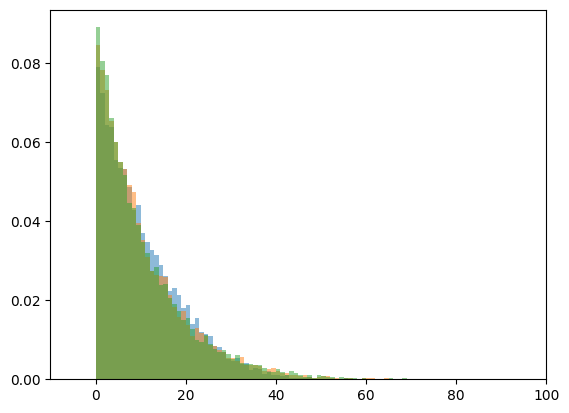

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s,min):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    if(M[a]>min):
      M[a] = M[a] - 1
      M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100,0))

bins = np.arange(-10, 100, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-10,100])
plt.show()



Reversing our discussion, we can see that if we move the minimum limit from 0 to -10, and equivalently the initial wealth is also 10 units lower than in the previous case, that is, each agent starts with 0 coins, we can notice that the result is analogous to the previous case, just shifted 10 units to the left.


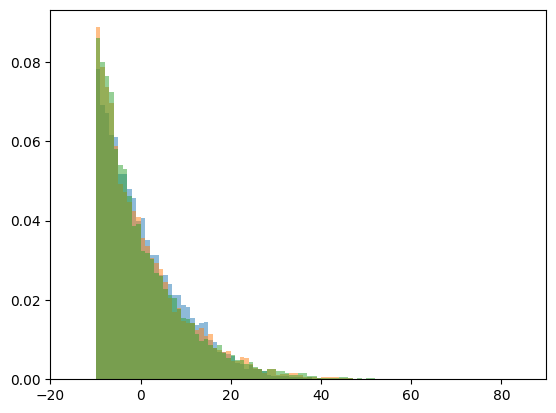

In [ ]:
# @title
M=[]
for x in range(3):
  M.append(simulacao(0,(x+1)*100,-10))

bins = np.arange(-20, 90, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-20,90])
plt.show()


O artigo traz uma lista de falácias que eu vou tentar trabalhar a partir de agora.

**Falácia 1**: O dinheiro cresce como resultado de investimento. Sobre isto, é citado um exemplo onde alega-se que por exemplo, ao comprar \$100 de ouro, e anos depois vender por \$200, o dinheiro aumentou.

Para avançarmos a discussão precisamos distinguir  o que o autor chama de duas camadas: há uma camada física na sociedade, onde situam todas as coisas com existência física, e outra camada monetária, isto é, relacionada ao dinheiro, que é uma camada informacional. As duas camadas estão acopladas e relacionadas mas não são exatamente a mesma coisa. Neste exemplo temos uma transação de ouro na camada física e uma transação monetária na camada informacional.

Neste caso, é preciso considerar todos agentes envolvidos. Se olhar de uma perspectiva individual 'parece' que o dinheiro aumentou, mas porque estamos olhando para um único indivíduo. Nada neste exemplo em nenhum lugar necessariamente o dinheiro deixa de ser conservado se olharmos o sistema como um todo. Mesmo que eu entregue \$100 para um agente em troca de ouro, e então entregue ouro para outro agente em troca de \$200, e mesmo que os agentes não tenham interagido entre si, no caso mais extremo, só implica na restrição da existência de $300 no sistema desde o começo. Outro exemplo envolvendo pension funds investment é abordado no paper, assim como a seguinte recomendação de leitura: H. S. Dent, The Great Boom Ahead (Hyperion, New York, 1993).

**Falácia 2**: O dinheiro cresce como resultado da produção. Se o dinheiro é uma forma de medir a riqueza,  e se a riqueza coletiva aumenta no tempo como resultado da produção, então o dinheiro deveria aumentar também.

Porém o aumento na produção, a expansão da camada física não se traduz imediatamente na expansão da camada monetária, elas são diferentes e seguem regras diferentes. Esse tipo de argumento é normalmente trazido pela escola monetária de economia.


**Falácia 3[^1]**: A terceira falácia é sobre modelos econômicos sem dinheiro. O argumento é que a maior parte das crises econômicas recentes são na camada monetária, e não na física. Então se tentarmos eliminar o dinheiro do modelo, assumindo um funcionamento ideal, não podemos explicar as crises econômicas. Mas por outro lado, podemos reduzir o modelo à transferência de dinheiro entre os agentes (abstraindo questões de produção) e obter resultados interessantes, isso é por exemplo a abordagem adotada no modelo do The Social Architecture of Capitalism (Ian Wright).

Dinheiro e bens físicos pertencem a diferentes camadas da economia, mas normalmente são combinados em uma única variável chamada de riqueza definida como $w_i=m_i+\sum_{j}p_jv_{ji}$, onde temos que a riqueza do agente $i$ é dada em parte pela riqueza monetária $m_i$ e em parte pelos produtos em sua posse, onde o preço $p_j$ é um coeficiente de conversão que converte de unidades físicas, o volume do produto $j$ em posse do agente $i$ ($v_{ji}$), para unidades monetárias.

Como combina conceitos de duas camadas diferentes, a riqueza se comporta de forma diferente do dinheiro. Por exemplo, a riqueza pode crescer com a produtividade.




**Falácia 4**:  Feita a distinção de dinheiro e riqueza, uma crítica válida a econofísicas pode ser dirigida a modelos que buscam interpretar a transferência e conservação não de dinheiro, mas de riqueza. Ainda que matematicamente equivalente, há uma diferença conceitual.



Chegamos agora a provavelmente um dos temas mais relevantes que é a criação do dinheiro pelo estado. Quando se pensa sobre o dinheiro ser conservativo (ou não) este é um dos principais pontos a serem levantados, afinal, o estado tem a capacidade (que de fato põe em prática) de produzir dinheiro. Então é natural nos perguntar como conciliar esta capacidade estatal com um modelo conservativo de dinheiro. Neste sentido, Yakovenko define então o sistema econômico como o conjunto de agentes privados onde o estado está fora do sistema. Neste caso o sistema é conservativo, ainda que a grandeza total não se mantenha conservada devido ao fluxo de entrada e saída da interação do sistema com componentes externos a ele. Ou seja, quando se constrói um modelo de um sistema econômico, o estado é considerado externo ao sistema e nesta condição, o dinheiro se conserva.

E quais são as motivações ou necessidade do estado injetar dinheiro no sistema? Uma razão dentre muitas é o crescimento da população. Se a população cresce mas a quantidade de dinheiro  não, então o dinheiro per capita vai decrescer, de forma que o poder de compra de uma mesma quantidade de dinheiro aumenta. Essa consequente diminuição nos preços é chamada de deflação, e assim que um agente perceber este fenômeno, ele pode se sentir estimulado  a guardar o dinheiro pois poderá comprar mais produtos no futuro, retirando mais dinheiro de circulação e acentuando a deflação. Então pode-se argumentar que o estado deveria aumentar a quantidade de dinheiro, pelo menos, em proporção com N. Até mesmo a escola monetária propôs uma regra monetária de injeção constante de dinheiro de acordo com um cronograma regular, argumentando que uma moderada inflação estimula a economia.

Se seguirmos o conceito no qual o dinheiro deve ser adquirido pelo trabalho, a melhor forma do estado injetar novo dinheiro é financiando projetos de infraestrutura pública que irão beneficiar toda sociedade.  Parte do financiamento desses projetos também podem ser pagos por impostos coletados pelo estado, a proporção entre ambos é uma questão técnica e prática, e não um dogma do tipo “balanço governamental equilibrado.” Um exemplo prático destes gastos são os gastos militares. Somente o governo pode pagar pelo enorme preço dos mísseis balísticos que ninguém quer usar, o complexo industrial-militar tem sido o principal motor da economia americana por muitos anos, milhares de dólares de novo dinheiro tem sido criado para pagar por guerras.

Dentro do estado, o governo é apenas um braço executivo e usualmente separado do banco central que tem autoridade monetária, isso significa que usualmente o governo não imprime dinheiro por si próprio. Assim o governo consegue recursos coletando impostos, taxas ou pegando emprestado emitindo títulos públicos por exemplo. Neste último caso, agentes privados emprestam dinheiro  para o governo de forma que não alteram o dinheiro total no sistema. Nos Estados Unidos, o governo opera quase sempre em déficit, emitindo novos títulos para refinanciar os antigos. Um dinheiro novo é injetado no sistema quando a Reserva Federal cria reservas bancárias e compra esses títulos no mercado, expandindo assim a base monetária. Porém, a Reserva Federal não tem permissão para comprar títulos diretamente do governo, apenas de bancos comerciais, gerando então o mesmo fluxo, porém pagando taxas para os bancos pela intermediação.

Além disso, os títulos públicos determinam que, ao final do prazo, o governo devolva ao Banco Central o valor principal acrescido de juros. No entanto, como o Banco Central repassa seus lucros ao Tesouro, o resultado líquido é equivalente a um empréstimo sem juros do Banco Central ao governo. Esse processo também permite ao Banco Central tanto injetar quanto remover dinheiro da economia, dependendo da necessidade.

No entanto, como essa compra não pode ser feita diretamente do governo, entram em cena os bancos comerciais (geralmente privados), que atuam como intermediários no processo. Essa intermediação lhes garante ganhos relevantes, seja por meio da revenda dos títulos ao banco central ou por lucros com operações relacionadas, o que reforça sua posição no sistema financeiro.

Ou seja, o sistema econômico frequentemente depende da injeção de novo dinheiro no circuito, o que pode ser feito principalmente através de gastos públicos. Porém, podemos notar que nos Estados Unidos, a indústria militar acabou se tornando um dos motores centrais dessa dinâmica. Em teoria, outros tipos de gasto público poderiam desempenhar papel semelhante. No entanto, a guerra permite não apenas a injeção de grandes volumes de recursos, mas também pode gerar ganhos políticos, como a desestabilização de nações consideradas inimigas, e benefícios econômicos indiretos, como o financiamento da reconstrução de infraestrutura destruída ou a imposição de acordos comerciais mais favoráveis.


Próximo assunto que podemos discutir é a realação da dívida com a criação de dinheiro. Primeiro vamos considerar o empréstimo sem bancos.

**Falácia 5**: Dinheiro cresce como resultado do empŕesimo entre pessoas físicas. Este é um caso 'simples' similar ao caso de investimento. O dinheiro se mantém conservado se consideramos um sistema como um todo. Se o agente 1 empresta dinheiro para o agente 2, essa quantia de dinheiro é emprestada é subtraída de um agente e adicionado no outro. Durante o empréstimo, o agente 1  fornece dinheiro para o agente 2, que em troca devolve uma nota promissória. Mas esta nota não é dinheiro, ela é um acordo pessoal entre os agentes, ela não circula, então não corresponde a um aumento no dinheiro, independente da taxa de interesse que ela prometa.

**Falácia 6**: O dinheiro cresce como resultado do interesse. Seguindo exemplo anterior, se o dinheiro foi empretado com uma taxa de interesse então o agente 1 fornece por exemplo \$100 para o agente 2, e recebe de volta \$110.  Mas novamente, este dinheiro adicional simplesmente deve ter origem em outros agentes do sistema. A quantidade de dinheiro, evidentemente, se conserva a nível de sistema. Nada disso implica necessariamente em produção de dinheiro, o que nos leva a próxima falácia.

**Falácia 7**: Dinheiro é dívida.

De forma superficial, o ato de pegar um empréstimo pode soar semelhante ao caso que descrevemos de produção de dinheiro no começo, onde ao agente 1 prestar serviço pro agente 2, recebia uma unidade de dinheiro descontada da riqueza do agente 2, podendo inclusive, ficar com uma quantidade de dinheiro negativa. Mas há diferenças significativas entre dinheiro e dívida.
- Dívida cria uma 'cadeia' conectando os dois agentes até que a dívida seja paga. Uma transação de dinheiro é o ponto final e os agentes não tem mais obrigação entre si.
- Dívida é pessoal, mas dinheiro é anônimo. A identificação dos agentes precisa constar em uma promissória, mas não em uma moeda.
- Dívida impõe umad ata a ser paga, enquanto dinheiro não tem marca temporal.
- Há penalidades por não pagar dívida, mas não há analogo para o dinheiro.
- Dívida usualmente envolve interesse, dinheiro não.

Em poucas palavras, o dinheiro é uma promessa para pagar dinheiro, não o dinheiro por si mesmo. De certa forma, podemos pensar que o empréstimo e as promissórias pode ser pensado como uma terceira camada, acima da segunda camada monetária onde o dinheiro realmente circula.





**Falácia 8**: A dívida estabiliza a si mesmo. Vamos discutir primeir a dívida como criação de partícula e anti-partícula. Vamos definir agora um patrimômio líquido do agente $i$ como $\omega_i=m_i+d_i$ onde $m_i$ é o dinheiro em posse do agente $i$ e $d_i=\sum d_{ij}$ são as obrigações monetárias, onde $d_ij$ é o dinheiro que $j$ deve a $i$, logo $d_i< 0$ indica que o agente $i$ deve dinheiro e $d_i>0$ indica que ele tem dinheir a receber.

Evidentemente, se o agente 1 empresta \$10 moedas ao agente 2, então ele perde 10 moedas ($m_i$ diminui 10 unidades ) de forma que diminui seu dinheiro total reduz, porém ele ganha 10 moedas em obrigações monetárias ($d_i$ aumenta 10), de forma que seu patromônio líquido permanece inalterado.

Se permitimos empréstimos entre agentes e não impomos limites, a dívida não é capaz de se estabilizar sozinha. Vamos refazer nossa simulação anterior com um limite inferior de moedas de 0, mas agora se o agente não tem dinheiro, ele pode pegar dinheiro de outros agentes e emitir uma promissória. Evidentemente agora ao invés de analisarmos a quantidade de dinheiro na posse de cada agente, vamos analisar o patrimônio líquido.

Temos um resultado análogo quando só tínhamos dinheiro e nenhuma restrição. Na prática, a condição de fronteira é removida, e e a dívida não é capaz de se estabilizar sozinha, ao menos que imposermos uma restrição novamente. Abaixo o resultado da simulação, onde vemos um resultado análogo ao anterior, onde a distribuição se torna mais larga e mais baixa conforme o tempo passa, uma difusão irreversível.

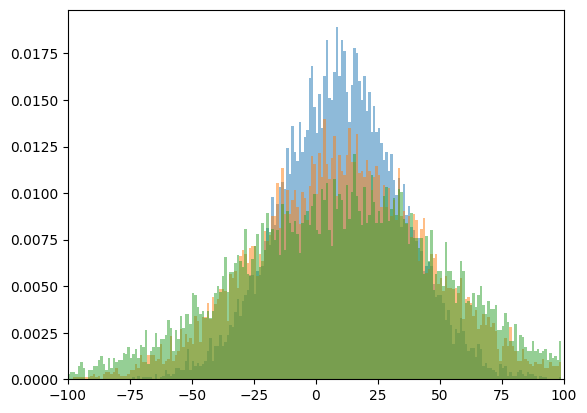

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  I = N*[0]
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    if(M[a]>0):         #Se tem dinheiro
      M[a] = M[a] - 1   #A perde dinheiro
      M[b] = M[b] + 1   #B ganha dinheiro
    else:               #Se não tem dinheiro
      continuar=True
      while(continuar):
        #Procura alguém com inheiro
        c = random.randint(0,N-1)
        if(M[c]>0):
          continuar=False
          M[c]=M[c]-1 #Desconta dinheiro
          I[c]=I[c]+1 #Aumenta oq ue tem a receber
          I[a]=I[a]-1 #Aumenta as dívidas
          M[b]=M[b]+1 #REcebe o dinheiro


    if(I[b]<0):       #Se B tem dívidas
      I[b]=I[b]+1     #Paga dívida
      M[b]=M[b]-1     #Perde dinheiro
      continuar=True
      while(continuar):
        #Procura alguem que tem dinheiro pra receber
        c = random.randint(0,N-1)
        if(I[c]>0):
          I[c]=I[c]-1 #Diminui o que tem a receber
          M[c]=M[c]+1 #Ganha moeda
          continuar=False
  return np.array(M)+np.array(I)

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*300))

bins = np.arange(-100, 100, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-100,100])
plt.show()



Abaixo impusemos uma retrição onde cada agente pode dever no máximo 10 moedas, e novamente encontramos uma situação de estabilidade.

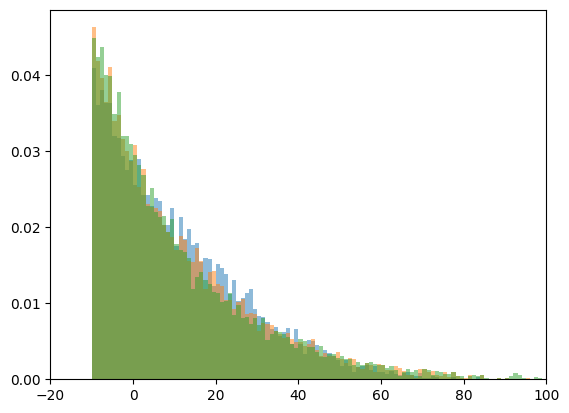

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  I = N*[0]
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    pago = False
    if(M[a]>0):         #Se tem dinheiro
      M[a] = M[a] - 1   #A perde dinheiro
      M[b] = M[b] + 1   #B ganha dinheiro
      pago=True
    elif(I[a]>-10):               #Se não tem dinheiro e não chegou no limite de dívida
      continuar=True
      while(continuar):
        #Procura alguém com inheiro
        c = random.randint(0,N-1)
        if(M[c]>0):
          continuar=False
          M[c]=M[c]-1 #Desconta dinheiro
          I[c]=I[c]+1 #Aumenta oq ue tem a receber
          I[a]=I[a]-1 #Aumenta as dívidas
          M[b]=M[b]+1 #REcebe o dinheiro
          pago=True

    if(I[b]<0 and pago==True):       #Se B tem dívidas
      I[b]=I[b]+1     #Paga dívida
      M[b]=M[b]-1     #Perde dinheiro
      continuar=True
      while(continuar):
        #Procura alguem que tem dinheiro pra receber
        c = random.randint(0,N-1)
        if(I[c]>0):
          I[c]=I[c]-1 #Diminui o que tem a receber
          M[c]=M[c]+1 #Ganha moeda
          continuar=False
  F=np.array(M)+np.array(I)
  return F

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*300))

bins = np.arange(-100, 100, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-20,100])
plt.show()



**Falácia 9** As taxas de interesse estabilizam o débitdo. Esta é uma falácia análoga, as taxas de interesse na verdade desestabilizam ainda mais o sistema, como foi mencionado anteriormente, apenas a restrição da dívida estabiliza o sistema. Abaixo as duas situações, onde adicionamos uma taxa de interesse de 1%.

# Tenho que revisar esse código

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  I = N*[0]
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    pago = False
    if(M[a]>=100):         #Se tem dinheiro
      M[a] = M[a] - 100   #A perde dinheiro
      M[b] = M[b] + 100   #B ganha dinheiro
      pago=True
    elif(M[b])
    else:               #Se não tem dinheiro e não chegou no limite de dívida, lembrando que agora a divida aumenta em 2 undiades
      #Procura alguém com inheiro
      c = random.randint(0,N-1)
      if(M[c]>100):
        M[c]=M[c]-100 #Desconta dinheiro
        I[c]=I[c]+101 #Aumenta oq ue tem a receber
        I[a]=I[a]-101 #Aumenta as dívidas
        M[b]=M[b]+100 #REcebe o dinheiro
        pago=True

    if(I[b]<=100 and pago==True):       #Se B tem dívidas
        #Procura alguem que tem dinheiro pra receber
        c = random.randint(0,N-1)
        if(I[c]>=100):
          I[b]=I[b]+100     #Paga dívida
          M[b]=M[b]-100     #Perde dinheiro
          I[c]=I[c]-100 #Diminui o que tem a receber
          M[c]=M[c]+100 #Ganha moeda
  F=np.array(M)+np.array(I)
  return F

M=[]
for x in range(3):
  M.append(simulacao(1000,(x+1)*10000))




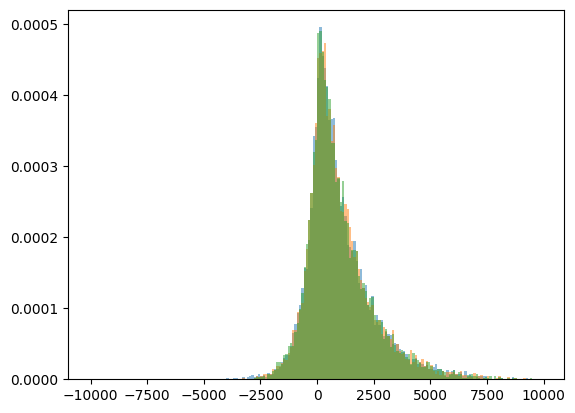

In [ ]:
bins = np.arange(-10000, 10000, 100)
for x in range(3):
  plt.hist(M[x],density=True,alpha=0.5,bins=bins)
#plt.xlim([50,80])
#plt.ylim([0,0.05])
plt.show()


In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  I = N*[0]
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    pago = False
    if(M[a]>=100):         #Se tem dinheiro
      M[a] = M[a] - 100   #A perde dinheiro
      M[b] = M[b] + 100   #B ganha dinheiro
      pago=True
    elif(I[a]>-1000+101):               #Se não tem dinheiro e não chegou no limite de dívida, lembrando que agora a divida aumenta em 2 undiades
      #Procura alguém com inheiro
      c = random.randint(0,N-1)
      if(M[c]>100):
        M[c]=M[c]-100 #Desconta dinheiro
        I[c]=I[c]+101 #Aumenta oq ue tem a receber
        I[a]=I[a]-101 #Aumenta as dívidas
        M[b]=M[b]+100 #REcebe o dinheiro
        pago=True

    if(I[b]<=100 and pago==True):       #Se B tem dívidas
        #Procura alguem que tem dinheiro pra receber
        c = random.randint(0,N-1)
        if(I[c]>=100):
          I[b]=I[b]+100     #Paga dívida
          M[b]=M[b]-100     #Perde dinheiro
          I[c]=I[c]-100 #Diminui o que tem a receber
          M[c]=M[c]+100 #Ganha moeda
  F=np.array(M)+np.array(I)
  return F

M=[]
for x in range(3):
  M.append(simulacao(1000,(x+1)*1000))




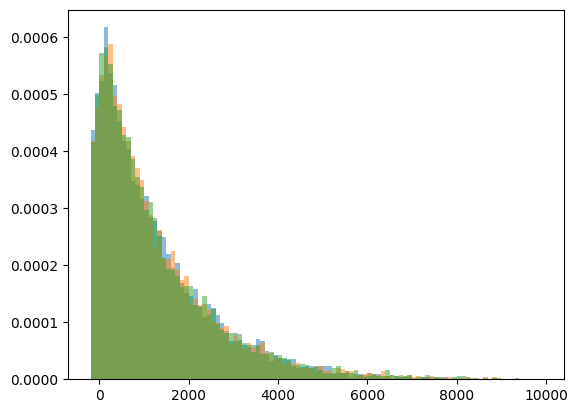

In [ ]:
# @title
bins = np.arange(-200, 10000, 100)
for x in range(3):
  plt.hist(M[x],density=True,alpha=0.5,bins=bins)
#plt.xlim([50,80])
#plt.ylim([0,0.05])
plt.show()



# TO aqui

**Falácia 10**:
Talvez o próximo item que merece uma menção é listado como a falácia dos modelos econômicos no qual as dívidas são sempre pagas como prometidas (falácia 10). Por um lado,se este é o caso, podemos simplesmente omitir, como é assumido implicitamente em muitos modelos. Porém alguns agentes não serão capazes de pagar, a análise matemática (que eu omiti, mas quem tiver interesse pegue o artigo original) indica que a criação de débito é um processo estatisticamente irreversível. Uma vez que a dívida é criada, ela não pode ser paga para todo o sistema.

**Falácia 11**:
Uma outra observação, é que uma vez que entendemos o funcionamento dos bancos, Yakovenko defende que eles não têm capacidade de criar dinheiro (apenas dívidas). Porém seu modus operandi funciona de forma que é do interesse do banco comercial gerar uma crise de escala catastrófica de forma que banco central sinta ser necessário intervir e injetar dinheiro nos bancos comerciais. Citando o artigo: “Assim, chega-se à conclusão de que a criação de crises em larga escala é parte essencial do atual modus operandi do sistema financeiro”, pois este processo é, em poucas palavras, lucrativo para os bancos. É talvez uma curiosidade interessante, que o Banco Central (no caso do artigo, dos EUA) só pode negociar com os bancos comerciais, então o novo dinheiro emitido por ele vai inevitavelmente para os bancos (e consequentemente banqueiros e a classe alta), aumentando a desigualdade na sociedade.

**Falácia 12**:
Por fim, chegamos no último tópico. Onde temos citações especiais para Karl Marx e O Capital. Mas em resumo, se a classe dos capitalistas  paga salário para a classe dos trabalhadores e esta classe usa este salário para comprar os produtos vendidos pelos próprio capitalistas, capitalistas individuais podem ter lucro a partir da perda de competidores que tiveram menos sucesso, mas a classe de capitalistas como um todo não poderia ter lucro.  Yakovenko defende então que dia mais cedo ou mais tarde, o sistema vai entrar em uma crise catastrófica.E neste ponto, o estado (o governo e o banco central) vão intervir e injetar dinheiro no sistema, produzindo então o lucro. Dessa forma, conclui-se que a última fonte do lucro monetário do capitalista é o dinheiro do estado. Vale lembrar que Yakovenko parece realizar sua análise a partir de uma perspectiva que se apoia na MMT. Ou seja, por um lado, não é uma leitura marxista do dinheiro e do estado, e por outro lado, não é uma leitura marxista do dinheiro e do estado, e mesmo assim, podemos notar os problemas estruturais que estão presentes no capitalismo.

[^1]: Não sei se eu chamaria isto de falácia, algumas outras também, mas vou manter a nomenclatura pela fidadelidade ao paper original.